In [25]:
# Due to duplicates in the dataset, the most reliable way to do this is just 
# by checking our filenames.
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
ke_gaz = "/home/dssg-cfa/ke-gazettes/"

fns = [fn for fn in os.listdir(ke_gaz)]

In [21]:
def get_year(fn):
    if "-special" in fn: 
        fn = fn.replace("-special", "")
    return int(fn[-4:])

yrs = [get_year(fn) for fn in fns if "gazette-ke" in fn]

In [26]:
def count_elements(lst): 
    dct = {}
    st = set(lst)
    for elem in st: 
        dct[elem] = lst.count(elem)
    return dct

years_hist = count_elements(yrs)

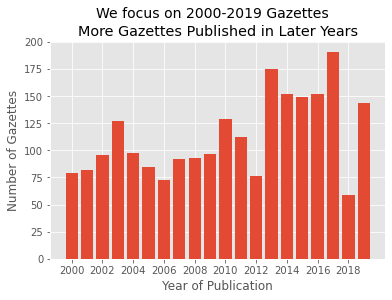

In [35]:
plt.style.use('ggplot')
plt.bar(years_hist.keys(), years_hist.values())
plt.ylabel("Number of Gazettes")
plt.xlabel("Year of Publication")
plt.title("More Gazettes Published in Later Years")
plt.suptitle("We focus on 2000-2019 Gazettes", y=1, fontsize=14)

plt.xticks(np.arange(min(years_hist.keys()), max(years_hist.keys())+1, 2))
plt.savefig('year_distr_2000_2019.png')
plt.show()


In [42]:
def contains_land_registration_act(data):
    for page in data['analyzeResult']['readResults']:
        for line in page['lines']: 
            if "LAND REGISTRATION ACT" in line['text']: 
                return True
    return False


n_relevant_gazettes = {}
for yr in set(yrs):
    n_relevant_gazettes[yr] = 0

# to keep track
count = 0

for fn in fns: 
    if "gazette-ke" not in fn: 
        continue
    yr = get_year(fn)
    with open("/home/dssg-cfa/ke-gazettes/" + fn) as f: 
        page_data = json.load(f)
    if contains_land_registration_act(page_data):
        n_relevant_gazettes[yr] += 1
    count += 1
    if count % 100 == 0:
        print(str(count))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


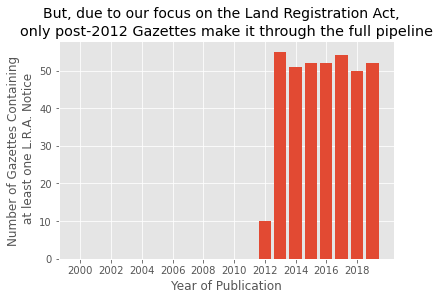

In [47]:
plt.style.use('ggplot')
plt.bar(n_relevant_gazettes.keys(), n_relevant_gazettes.values())
plt.ylabel("Number of Gazettes Containing\n at least one L.R.A. Notice")
plt.xlabel("Year of Publication")
plt.title("only post-2012 Gazettes make it through the full pipeline")
plt.suptitle("But, due to our focus on the Land Registration Act,", y=1, fontsize=14)
plt.xticks(np.arange(min(yrs), max(yrs) + 1, 2))

plt.savefig('year_distr_LRA.png')
plt.show()

In [48]:
# this counts mentions in the table of contents, so over-counts slightly, 
# but not enough to make a huge difference on the graph. 

def get_num_lra_notices(data):
    count = 0
    for page in data['analyzeResult']['readResults']:
        for line in page['lines']: 
            if "LAND REGISTRATION ACT" in line['text']: 
                count +=1
    return count


n_LRA_notices = {}
for yr in set(yrs):
    n_LRA_notices[yr] = 0

# to keep track
count = 0

for fn in fns: 
    if "gazette-ke" not in fn: 
        continue
    yr = get_year(fn)
    with open("/home/dssg-cfa/ke-gazettes/" + fn) as f: 
        page_data = json.load(f)
    n_LRA_notices[yr] += get_num_lra_notices(page_data)
    count += 1
    if count % 100 == 0:
        print(str(count))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200


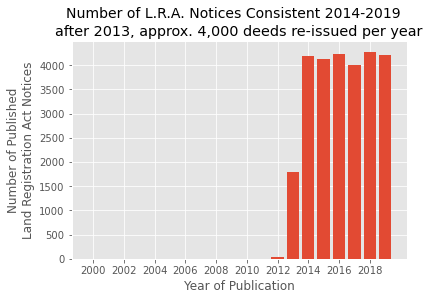

In [58]:
plt.style.use('ggplot')
plt.bar(n_LRA_notices.keys(), n_LRA_notices.values())
plt.ylabel("Number of Published\nLand Registration Act Notices")
plt.xlabel("Year of Publication")
plt.title("after 2013, approx. 4,000 deeds re-issued per year")
plt.suptitle("Number of L.R.A. Notices Consistent 2014-2019", y=1, fontsize=14)
plt.xticks(np.arange(min(yrs), max(yrs) + 1, 2))

plt.savefig('year_distr_LRA_notices.png')
plt.show()

In [59]:
sum(n_LRA_notices.values())

26851